**# Zadanie1: Czy jest możliwe żeby dwie pierwsze komponenty objaśniały 100% wariancji danych 50D? Jeśli nie - udowodnij, jeśli tak - podaj przykład.**

Pytanie jest dosyc nieprecyzyjne - to zalezy od danych. Jezeli dane znajduja sie w przestrzeni 50 wymiarowej, ale cala ich zmiennosc lezy na dwoch plaszczyznach, to tak, mozliwe jest pelne objasnienie danych w dwoch pierwszych komponentach.

**Przykład:** Nieskonczenie cienka kartka papieru moze byc opisana przez dwa eigenvectory, mimo ze znajduje sie w przestrzeni 3D

**Zadanie2: Rozważ dane iris. Dokonaj standaryzacji a następnie przeprowadź algorytm PCA**
**Która z cech wydaje się najistoniejsza? Ile komponentów wystarczająco dobrze opisuje te dane?**
**Skomentuj otrzymane wyniki**

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


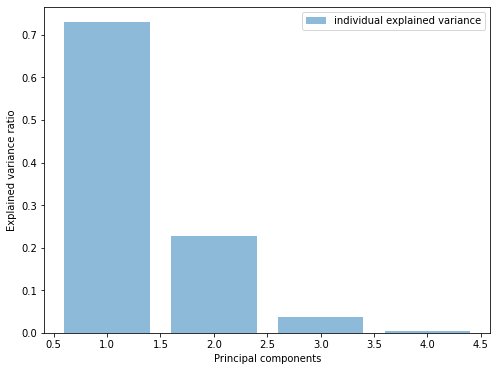

In [1]:


from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


iris = datasets.load_iris()
df_iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

X = df_iris.iloc[:,:-1]
Y = df_iris.iloc[:,-1]

stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)

cov_mat = np.cov(X_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues \n%s'% eigen_vals)

tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]

plt.figure(figsize=(8,6))
plt.bar( range(1, 5), var_exp, alpha=0.5,   align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

# KOMENTARZ: Dane sa dobrze opisane przez dwa eigenvectory, ktore razem objasniaja 90% zmiennosci zawartej w datasecie.

**Zadanie3: Rozważ jeszcze raz dane dotyczące twarzy różnych osób (fetch_lw_people) rozważane podczas ćwiczenia z SVM.**
**Zastosuj podobnie jak wtedy PCA ze 150 komponentnami. Jaki procent wariancji opisują te komponenty?**
**Narsuj kilka początkowych komponentów (wektory własne); oczywiście podobnie jak obrazy są to wektory 64 * 47**
**wymiarowe - przed narysowaniem należy jeszcze zastosować metodę reshape. Zastanów się nad ich interpretacją.**

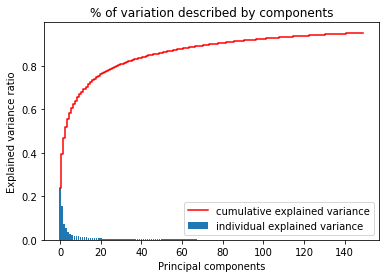

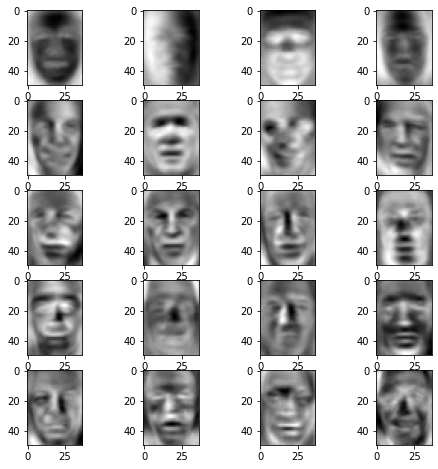

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

data = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = data.images.shape

X = data.data
n_features = X.shape[1]

y = data.target
target_names = data.target_names
n_classes = target_names.shape[0]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=150, svd_solver="randomized", whiten=True).fit(X_std)
eigenfaces = pca.components_.reshape((150, h, w))


var_exp_cum = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_, align='center', label='individual explained variance')
plt.step(range(len(pca.explained_variance_ratio_)), var_exp_cum, where='mid', label='cumulative explained variance',color = "r")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('% of variation described by components')
plt.legend(loc='best')
plt.show()


fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    img = eigenfaces[i-1].reshape((h, w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap=plt.cm.gray)
plt.show()

** Zadanie 4: **

Zauważ, że wykresy te różnią się zakresem wartości - czy to zrozumiałe?

Redukcja wymiaru – proces zmniejszania liczby zmiennych branych pod
uwagę podczas analizy, w taki sposób aby zachować jak najwięcej
istotnych informacji. Redukcja wymiaru może polegać na:
**Wdrożenie i utrzymanie – im mniej cech tym ten proces
będzie prostszy.** 


1) Selekcji cech (ang. feature selection) – ograniczeniu zbioru
zmiennych według pewnych reguł (np. cechy nadmiernie
skorelowane ze sobą, cechy nieistotne statystycznie)


2) Ekstrakcji cech (ang. feature extraction) – tworzeniu nowych
cech pochodnych z początkowego zestawu danych celem
uzyskania mniejszego zbioru zmiennych.

Selekcja cech: wybór zmiennych - metody oparte na filtrach:
- Próg wariancji (ang. variance threshold) – usuwamy cechy o
stałej wariancji.
- Współczynnik korelacji Pearsona – dobre zmienne powinny
być mocno skorelowane ze zmienną docelową.
- Statystyka x2 – testujemy związek między cechami w zbiorze
danych, a zmienną docelową. Obliczamy wartość statystyki χ2
między każdą cechą a celem i wybieramy pożądaną liczbę
cech z najlepszymi wynikami.

Metody oparte na wrapperach:
- Przeszukiwanie w przód (ang. forward feature selection)
- Przeszukiwanie w tył (ang. backward feature elimination)
- Przeszukiwanie wyczerpujące (ang. exhaustive feature
selection)